# Описание датасета

По заданию используется датасет Breast Cancer Wisconsin, скачанный с ресурса Kaggle. Для начала датасет необходимо проанализировать. \
Основных характеристик в данном датасете 10. Но для каждой из этих характеристик вычислены mean (среднее значение), se (стандартная ошибка), worst. Итого датасет содержит 30 признаков, каждый из которых в той или иной степени может влиять на определение рака молочной железы. \
Признаки, относящиеся к типу средних значений, отражают реальные свойства опухолей, вероятно имеют высокую корреляцию с диагнозом.\
Признаки, относящиеся к типу стандартной ошибки, скорее отражают статистическую погрешность, и, предположительно, не оказывают существенного влияния на определение болезни. Необходима проверка по матрице корреляций. \
Признаки с худшим значением, могут оказывать влияние на прогноз, однако индивидуально, в зависимости от самой характеристики, которую они отражают. \
Реальные характеристики:
*   Радиус (среднее значение расстояний от центра до точек по периметру);
*   Текстура (стандартное отклонение значений серого масштаба);
*   Периметр;
*   Площадь;
*   Гладкость (локальное изменение длин радиусов);
*   Компактность (периметр^2 / площадь - 1. 0);
*   Вогнутость (выраженность вогнутых участков контура);
*   Вогнутые точки (количество вогнутых участков контура);
*   Симметрия;
*   Фрактальная размерность.


# Импорт библиотек и загрузка датасета

Импортируются библиотеки, загружается датасет.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Предобработка данных

Для вывода информации о данных используется метод .info().

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Датасет содержит 569 запись, 32 столбца. Столбце с индексом не учитывается. Столбец "Unnemed: 32" содержит Nan во всех строках, данный столбце удаляется. Типы данных корректны. \
Используется функция .describe() для описания числовых признаков.

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Как видно из результата выполнения команды, данные имеют большой разброс по значениям. Для обучения необходима нормализация данных. \
Выполняется проверка датасета на наличие пропусков.

In [ ]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Пропуски обнаружены в столбце «Unnemed: 32», данный столбец необходимо удалить. \
Поиск явных дубликатов в данных с помощью метода duplicated().

In [ ]:
print(data.duplicated().sum())

0


Явные дубликаты не найдены. \
Столбец «Unnemed: 32» исключается.

In [ ]:
new_data = pd.DataFrame(data, columns=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
new_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Проверка разброса целевой переменной.

Классы: {'B': np.int64(357), 'M': np.int64(212)}
Соотношение: 59.38% злокачественных к доброкачественным


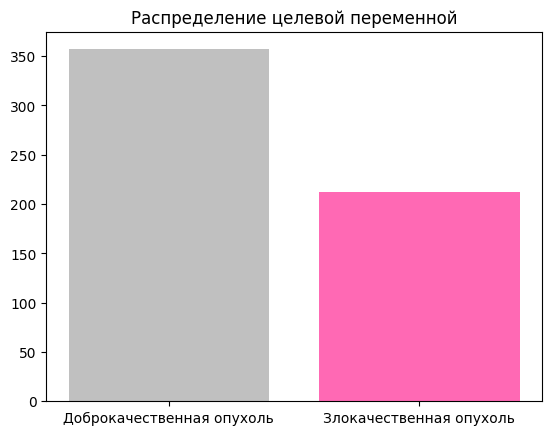

In [ ]:
import matplotlib.pyplot as plt
y = new_data['diagnosis']
unique, counts = np.unique(y, return_counts=True)
print(f"Классы: {dict(zip(unique, counts))}")
print(f"Соотношение: {counts[1]/counts[0]:.2%} злокачественных к доброкачественным")
plt.bar(['Доброкачественная опухоль', 'Злокачественная опухоль'], counts, color=['silver', 'hotpink'])
plt.title('Распределение целевой переменной')
plt.show()

Значения "B" и "M" из столбца целевой переменной преобразуются в 0 и 1, соответсвенно.

In [ ]:
new_data['diagnosis'] = new_data['diagnosis'].map({'B': 0, 'M': 1})
new_data['diagnosis'].unique()

array([1, 0])

Соотношение 59.38% злокачественных к доброкачественным приемлемо, балансировка не требуется. \
Строится тепловая карта корреляций.

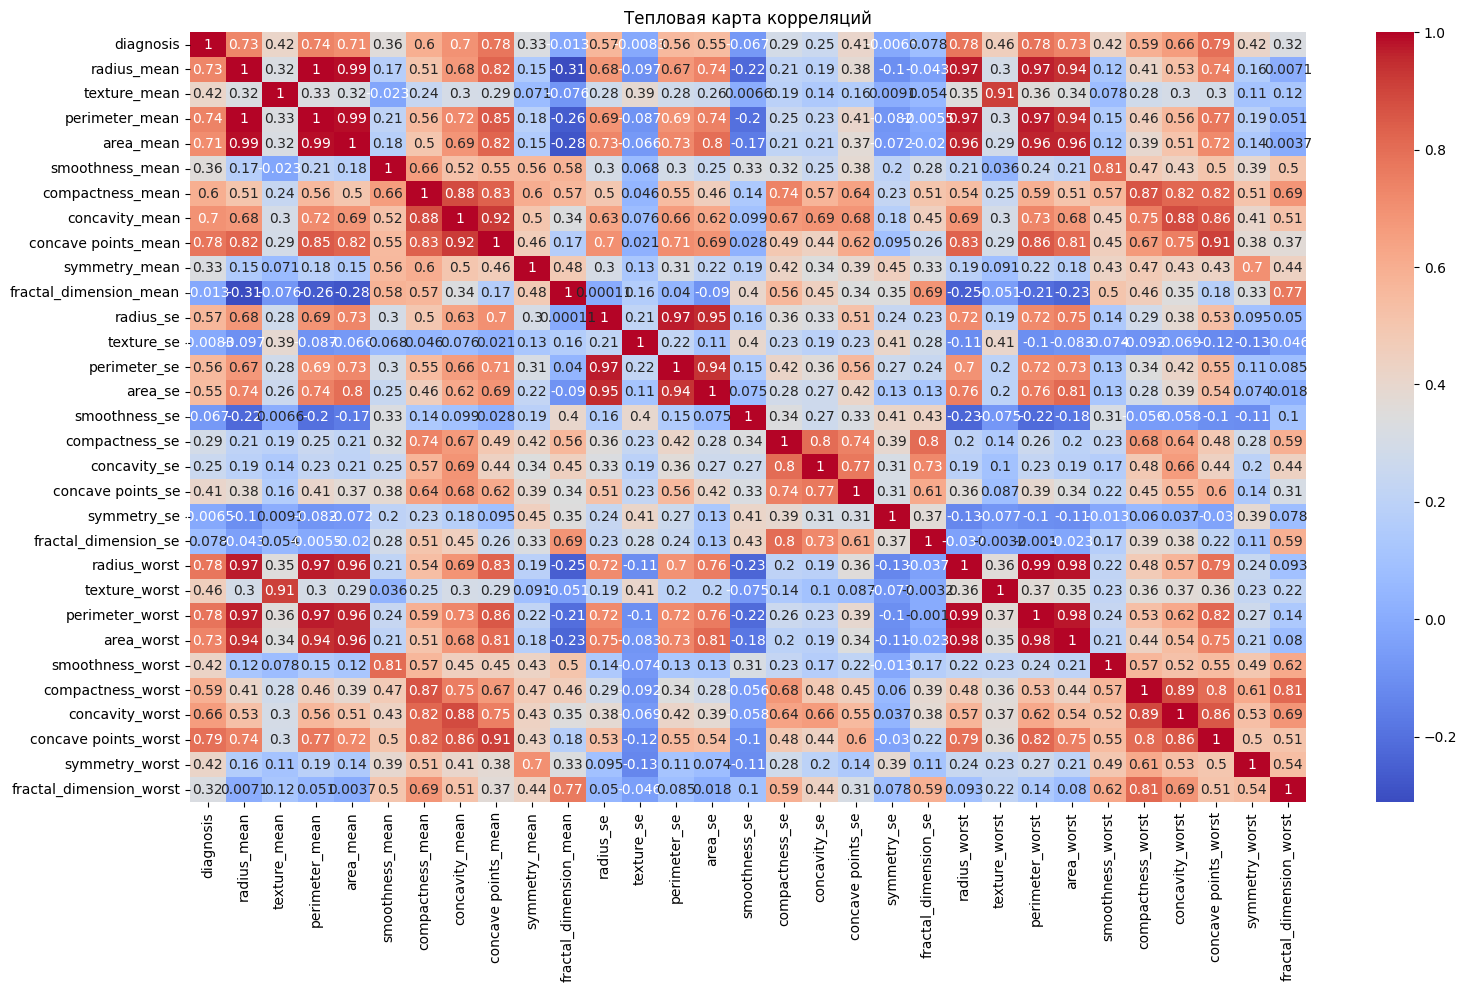

In [ ]:
import seaborn as sns
corr_matrix = new_data.drop(columns=['id']).select_dtypes(include=['number']).corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляций")
plt.show()

Низкие коэффициенты корреляции между признаками smoothness_se, symmetry_se, fractal_dimension_se, texture_se, fractal_dimension_mean и целевой переменной diagnosis наталкивают на решение удалить данные признаки из обучения. \
Удаление признаков с низким коэффициентом корреляции. Удаление столбца с id.

In [ ]:
data_clean = new_data.copy()
data_clean = data_clean.drop(['smoothness_se', 'symmetry_se', 'fractal_dimension_se', 'texture_se', 'fractal_dimension_mean', 'id'], axis=1)
data_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Выполняется нормализация признаков. Разделение на тренировочную и тестовую выборки.

In [ ]:
X = data_clean.drop('diagnosis', axis=1).values
y = data_clean['diagnosis'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание нейронной сети

Создается нейронная сеть для бинарной классификации.

In [ ]:
def create_model(initial_weights=None):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(25,)),
        Dense(1, activation='sigmoid')
    ])

    if initial_weights is not None:
        model.set_weights(initial_weights)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Далее реализуется сеть Хопфилда.

In [ ]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for x in patterns:
            x = x.reshape(-1, 1)
            self.weights += np.dot(x, x.T)
        np.fill_diagonal(self.weights, 0)
        self.weights /= len(patterns)

    def recall(self, pattern, max_iter=10):
        if len(pattern) != self.size:
            raise ValueError(f"Ожидается паттерн размера {self.size}, получен {len(pattern)}")

        pattern = pattern.copy()
        for _ in range(max_iter):
            for i in range(self.size):
                pattern[i] = np.tanh(np.dot(self.weights[i], pattern))
        return pattern * 0.3

Далее генерируются начальные веса для нейросети.

In [ ]:
patterns = X[:100]
patterns_with_target = np.hstack([patterns, y[:100]])
hopfield = HopfieldNetwork(patterns_with_target.shape[1])
hopfield.train(patterns_with_target)

def generate_hopfield_weights():
    input_size = 25
    hidden_size = 16

    optimized_input = np.zeros((input_size, hidden_size))
    for i in range(hidden_size):
        pattern = np.random.normal(0, 0.1, hopfield.size)
        optimized = hopfield.recall(pattern)[:input_size]
        optimized_input[:, i] = optimized

    output_pattern = np.random.normal(0, 0.1, hopfield.size)
    optimized_output = hopfield.recall(output_pattern)[:hidden_size].reshape(-1, 1)

    return [optimized_input, np.zeros(hidden_size), optimized_output, np.zeros(1)]

hopfield_weights = generate_hopfield_weights()

# Обучение и сравнение моделей

Далее обучается модель с обычной инициализацией.

In [ ]:
normal_model = create_model()
normal_history = normal_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.8012 - loss: 0.5345 - val_accuracy: 0.8772 - val_loss: 0.4681
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8934 - loss: 0.4249 - val_accuracy: 0.9211 - val_loss: 0.3671
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9406 - loss: 0.3368 - val_accuracy: 0.9386 - val_loss: 0.3008
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9439 - loss: 0.2827 - val_accuracy: 0.9386 - val_loss: 0.2551
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9496 - loss: 0.2493 - val_accuracy: 0.9386 - val_loss: 0.2203
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9492 - loss: 0.2175 - val_accuracy: 0.9386 - val_loss: 0.1943
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9650 - loss: 0.1776 - val_accuracy: 0.9386 - val_loss: 0.1739
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9437 - loss: 0.1718 - val_accuracy: 0.9474 - val_loss: 0.1579


 Затем обучается модель с оптимизированными весами

In [ ]:
hopfield_model = create_model(hopfield_weights)
hopfield_history = hopfield_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3786 - loss: 5.8555 - val_accuracy: 0.3772 - val_loss: 5.0281
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3956 - loss: 5.0696 - val_accuracy: 0.3860 - val_loss: 4.5127
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3387 - loss: 5.0216 - val_accuracy: 0.3860 - val_loss: 4.0250
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3874 - loss: 4.4246 - val_accuracy: 0.3860 - val_loss: 3.5867
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3635 - loss: 3.9752 - val_accuracy: 0.3860 - val_loss: 3.1860
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3963 - loss: 3.1589 - val_accuracy: 0.3860 - val_loss: 2.8371
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4174 - loss: 2.8704 - val_accuracy: 0.3860 - val_loss: 2.5125
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4066 - loss: 2.6213 - val_accuracy: 0.3860 - val_loss

# Сравнение моделей

Реализуются графики изменения точности для обычной модели и для модели с оптимизированными весами.

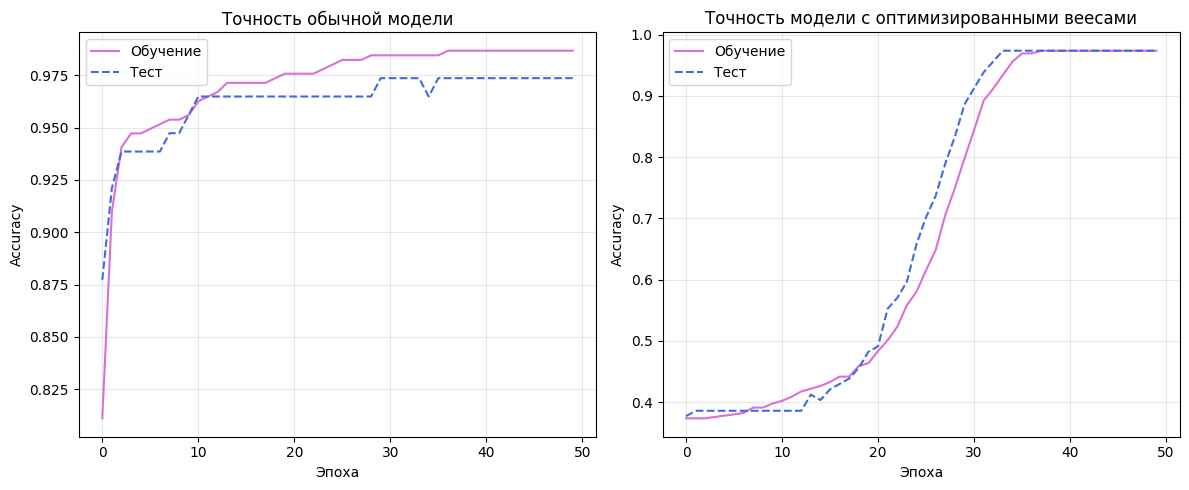

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(normal_history.history['accuracy'], color='orchid', linestyle='-', linewidth=1.5, label='Обучение')
plt.plot(normal_history.history['val_accuracy'], color='royalblue', linestyle='--', linewidth=1.5, label='Тест')
plt.title('Точность обычной модели')
plt.ylabel('Accuracy')
plt.xlabel('Эпоха')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(hopfield_history.history['accuracy'], color='orchid', linestyle='-', linewidth=1.5, label='Обучение')
plt.plot(hopfield_history.history['val_accuracy'], color='royalblue', linestyle='--', linewidth=1.5, label='Тест')
plt.title('Точность модели с оптимизированными веесами')
plt.ylabel('Accuracy')
plt.xlabel('Эпоха')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Обычная модель уже на 10 эпохе  достигает высокой точности >95%. Переобучения  нет. Тестовая точность чуть хуже обучающей, но стабильна после 15–20 эпохи. Модель хорошо работает с самого начала, весам не требуется долго подстраиваться, модель быстро находит хорошие представления. \
Точность модели с оптимизированными весами до 20 эпохи практически не растёт, начальные веса явно неудачные для старта, видимо, слишком смещены. Резкий рост после 20 эпохи. На примерно 35 эпохе модель показывает хорошие результаты 98% точности и на обучении, и на тесте. \
Из данного графика можно сделать вывод, что использование оптимизированных весов влияет на скорость сходимости негативно. Модель обучается значительно медленнее на первых этапах. \
Далее строится график потерь для обычной модели и для модели с оптимизированными весами.

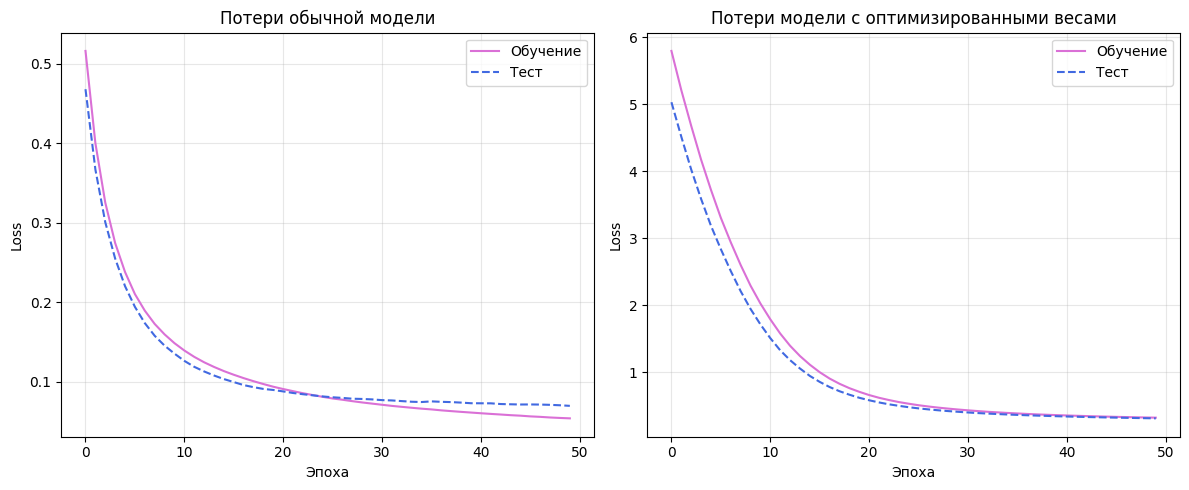

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(normal_history.history['loss'], color='orchid', linestyle='-', linewidth=1.5, label='Обучение')
plt.plot(normal_history.history['val_loss'], color='royalblue', linestyle='--', linewidth=1.5, label='Тест')
plt.title('Потери обычной модели')
plt.ylabel('Loss')
plt.xlabel('Эпоха')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(hopfield_history.history['loss'], color='orchid', linestyle='-', linewidth=1.5, label='Обучение')
plt.plot(hopfield_history.history['val_loss'], color='royalblue', linestyle='--', linewidth=1.5, label='Тест')
plt.title('Потери модели с оптимизированными весами')
plt.ylabel('Loss')
plt.xlabel('Эпоха')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Потери обычной модели на обучении и тесте стабильно уменьшаются. Уже к 15 эпохе loss становится меньше 0,1 и почти не изменяется. Нет переобучения, модель хорошо обобщается. \
Модель с оптимизированными весами имеет начальные потери значительно выше. Но затем значения потерь также быстро и стабильно падают.\
В целом, потери сходятся немного медленнее.
